## Importing necessary library

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

In [293]:
df=pd.read_csv("./Titanic-Dataset.csv")

In [294]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [296]:
df.shape

(891, 12)

#### counting passanger based on some features

In [297]:
df.groupby(df["Sex"]).agg({"PassengerId":"count"})

,PassengerId
Sex,
female,314
male,577


In [298]:
df.groupby(df["Pclass"]).agg({"PassengerId":"count"})

,PassengerId
Pclass,
1,216
2,184
3,491


In [299]:
df.groupby(df["Cabin"]).agg({"PassengerId":"count"})

,PassengerId
Cabin,
A10,1
A14,1
A16,1
A19,1
A20,1
...,...
F33,3
F38,1
F4,2


## Data Cleaning

#### Checking for missing/null values

In [300]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling Missing values

##### Embarked cloumn has only 2 missing values so replacing nan values with mode of embarked

In [301]:
mode_embarked = df["Embarked"].mode()[0]

In [302]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode_embarked)

##### Cabin cloumn has 687 missing values to replace them with default cabin "General"

In [303]:
df["Cabin"]=df["Cabin"].replace(np.nan,"General")

##### Age cloumn has 177 missing values
##### step 1 : create Salutation column
##### step 2 : group by salutation and passenger class
##### step 3 : taking average age of passenger according to salutation and passenger class
##### setp 4 : filling nan values in age with its mean value

In [304]:
df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [305]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,General,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,General,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,General,S,Mr


In [306]:
df.groupby(['Salutation', 'Pclass']).agg({"PassengerId":"count"})

PassengerId
Salutation   Pclass             
Capt         1                 1
Col          1                 2
Don          1                 1
Dr           1                 5
             2                 2
Jonkheer     1                 1
Lady         1                 1
Major        1                 2
Master       1                 3
             2                 9
             3                28
Miss         1                46
             2                34
             3               102
Mlle         1                 2
Mme          1                 1
Mr           1               107
             2                91
             3               319
Mrs          1                42
             2                41
             3                42
Ms           2                 1
Rev          2                 6
Sir          1                 1
the Countess 1                 1

In [307]:
mean_age = df.groupby(['Salutation', 'Pclass'])['Age'].transform('mean')

In [308]:
df['Age'] = df['Age'].fillna(mean_age)

In [309]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,General,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,General,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,General,S,Mr


In [310]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Salutation     0
dtype: int64

#### Checking for duplicate values

In [311]:
df["PassengerId"].duplicated().sum()

0

In [312]:
df["Ticket"].duplicated().sum()

210

##### here there are duplicate ticket no. but we will ingore them since the members from same family may book ticket together thus they get same ticket no.

#### Keeping only Necessary features

In [313]:
df.drop(columns=["PassengerId","Name","Ticket","Salutation"],inplace=True)

In [314]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,General,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,General,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,General,S


## Data Visualtsation

#### 1. Pclass v/s Survived

In [315]:
total_passenger=df.groupby("Pclass").size()
print("Passanger travelling in different class\n",total_passenger)

Passanger travelling in different class
 Pclass
1    216
2    184
3    491
dtype: int64


In [316]:
survived=df[df["Survived"]==1].groupby("Pclass").size()
print("No. of passenger travelling different passanger class survived\n",survived)

No. of passenger travelling different passanger class survived
 Pclass
1    136
2     87
3    119
dtype: int64


In [317]:
not_survived=total_passenger-survived
print("No. of passenger travelling different passanger class not survived\n",not_survived)

No. of passenger travelling different passanger class not survived
 Pclass
1     80
2     97
3    372
dtype: int64


In [318]:
percentage_Survived=(survived/total_passenger)*100
print("Percentage of passenger travelling in different class survived\n",percentage_Survived)

Percentage of passenger travelling in different class survived
 Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


In [319]:
percentage_not_Survived=100-percentage_Survived
print("Percentage of passenger travelling in different class not survived\n",percentage_not_Survived)

Percentage of passenger travelling in different class not survived
 Pclass
1    37.037037
2    52.717391
3    75.763747
dtype: float64


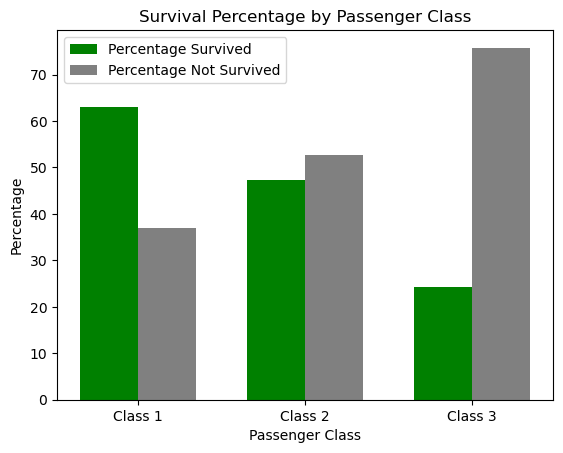

In [320]:
index=total_passenger.index
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, percentage_Survived, bar_width, label='Percentage Survived', color='green')
bar2 = ax.bar(index + bar_width/2, percentage_not_Survived, bar_width, label='Percentage Not Survived', color='grey')

ax.set_xlabel('Passenger Class')
ax.set_ylabel('Percentage')
ax.set_title('Survival Percentage by Passenger Class')
plt.legend()
ax.set_xticks(index)
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

#### 2. Sex v/s Survived , Age_range v/s Survived , is_Alone v/s Survived

#### Defining age range column

In [321]:
df["Age_range"]="range"

In [322]:
print("Maximum Age :",df["Age"].max())
print("Minimum Age :",df["Age"].min())

Maximum Age : 80.0
Minimum Age : 0.42


In [323]:
for i in range(len(df["Age"])):
    if df.iloc[i]["Age"]<10:
        df["Age_range"][i]="[0-10)"
    elif 10<=df.iloc[i]["Age"]<20:
        df["Age_range"][i]="[10-20)"
    elif 20<=df.iloc[i]["Age"]<30:
        df["Age_range"][i]="[20-30)"
    elif 30<=df.iloc[i]["Age"]<40:
        df["Age_range"][i]="[30-40)"
    elif 40<=df.iloc[i]["Age"]<50:
        df["Age_range"][i]="[40-50)"
    elif 50<=df.iloc[i]["Age"]<60:
        df["Age_range"][i]="[50-60)"
    elif 60<=df.iloc[i]["Age"]<70:
        df["Age_range"][i]="[60-70)"
    elif 70<=df.iloc[i]["Age"]<=80:
        df["Age_range"][i]="[70-80]"

In [324]:
df.groupby("Age_range").size()

Age_range
[0-10)      66
[10-20)    135
[20-30)    312
[30-40)    186
[40-50)    118
[50-60)     48
[60-70)     19
[70-80]      7
dtype: int64

#### Defining Is_Alone column

In [325]:
df["is_Alone"]="True"

In [326]:
for i in range(len(df["SibSp"])):
    if (df.iloc[i]["SibSp"] + df.iloc[i]["Parch"])==0:
        df["is_Alone"][i]="False"
    else:
        df["is_Alone"][i]="True"

In [327]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_range,is_Alone
0,0,3,male,22.0,1,0,7.2500,General,S,[20-30),True
1,1,1,female,38.0,1,0,71.2833,C85,C,[30-40),True
2,1,3,female,26.0,0,0,7.9250,General,S,[20-30),False
3,1,1,female,35.0,1,0,53.1000,C123,S,[30-40),True
4,0,3,male,35.0,0,0,8.0500,General,S,[30-40),False


In [328]:
temp_df=df.copy()

In [329]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [330]:
df['Sex']= label.fit_transform(df['Sex']) 
df['Age_range']= label.fit_transform(df['Age_range']) 
df['is_Alone']= label.fit_transform(df['is_Alone']) 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_range,is_Alone
0,0,3,1,22.0,1,0,7.2500,General,S,2,1
1,1,1,0,38.0,1,0,71.2833,C85,C,3,1
2,1,3,0,26.0,0,0,7.9250,General,S,2,0
3,1,1,0,35.0,1,0,53.1000,C123,S,3,1
4,0,3,1,35.0,0,0,8.0500,General,S,3,0


#### Plotting graphs

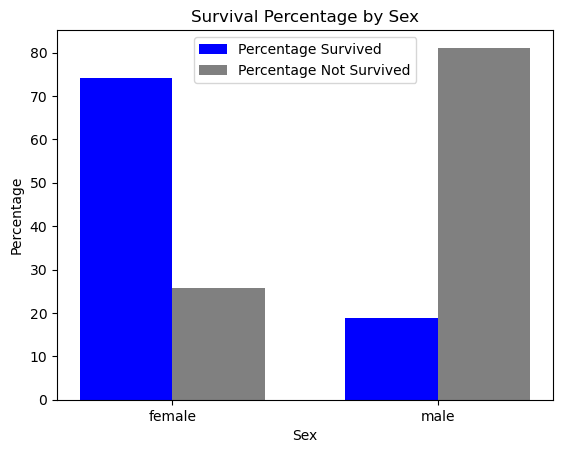

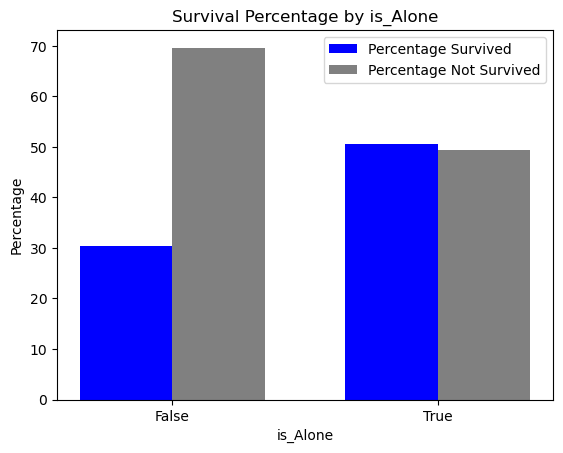

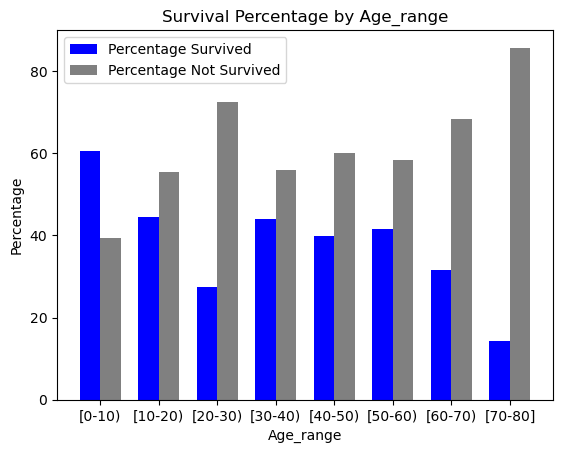

In [332]:
columns=["Sex","is_Alone","Age_range"]
for i in columns:
    total_passenger = df.groupby(i).size()
    survived = df[df['Survived'] == 1].groupby(i).size()
    not_survived = total_passenger-survived
    percentage_Survived = (survived / total_passenger * 100)
    percentage_not_Survived = 100 - percentage_Survived

    bar_width = 0.35
    index = total_passenger.index
    fig, ax = plt.subplots()
    bar1 = ax.bar(index - bar_width/2, percentage_Survived, bar_width, label='Percentage Survived', color='blue')
    bar2 = ax.bar(index + bar_width/2, percentage_not_Survived, bar_width, label='Percentage Not Survived', color='grey')
    
    ax.set_xlabel(i)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Survival Percentage by {i}')
    ax.set_xticks(index)
    l=[]
    for j in range(len(temp_df.groupby(i).size())):
        l.append(temp_df.groupby(i).size().index[j])
    ax.set_xticklabels(l)
    ax.legend()
    
    plt.show()
    

In [333]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_range,is_Alone
0,0,3,1,22.0,1,0,7.2500,General,S,2,1
1,1,1,0,38.0,1,0,71.2833,C85,C,3,1
2,1,3,0,26.0,0,0,7.9250,General,S,2,0
3,1,1,0,35.0,1,0,53.1000,C123,S,3,1
4,0,3,1,35.0,0,0,8.0500,General,S,3,0


#### Kepping only useful features

In [334]:
df.drop(columns=["Age_range","is_Alone"],axis=1,inplace=True)

In [335]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,General,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,General,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,General,S


## Applying ML models

#### Converting all catogorial data to numerical value

In [337]:
df["Cabin"]=label.fit_transform(df["Cabin"])
df["Embarked"]=label.fit_transform(df["Embarked"])

In [338]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,146,2


#### Train test split

In [346]:
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [347]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=45)

#### Models

In [379]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

### 1. Decision Tree

In [351]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [362]:
Y_pred=dt.predict(X_test)

In [363]:
print("Accuracy of Decision Tree :",accuracy_score(Y_test,Y_pred))

Accuracy of Decision Tree : 0.7491525423728813


In [367]:
cvs=cross_val_score(dt,X_train,Y_train,cv=10,scoring="accuracy")
print("Cross Validation Score :",cvs)
print("Mean Accuracy :",cvs.mean())

Cross Validation Score : [0.81666667 0.73333333 0.76666667 0.75       0.78333333 0.7
 0.6440678  0.77966102 0.66101695 0.69491525]
Mean Accuracy : 0.7329661016949152


In [369]:
print("Classification Report :\n",classification_report(Y_test,Y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       192
           1       0.61      0.79      0.69       103

    accuracy                           0.75       295
   macro avg       0.74      0.76      0.74       295
weighted avg       0.78      0.75      0.75       295



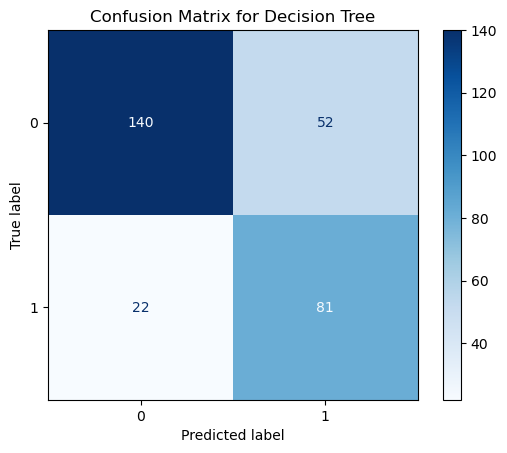

In [382]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

### 2. Random Forest

In [352]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [387]:
Y_pred=rf.predict(X_test)

In [390]:
print("Accuracy of Random Forest :",accuracy_score(Y_test,Y_pred))

Accuracy of Random Forest : 0.847457627118644


In [392]:
cvs=cross_val_score(rf,X_train,Y_train,cv=10,scoring="accuracy")
print("Cross Validation Score :",cvs)
print("Mean Accuracy :",cvs.mean())

Cross Validation Score : [0.86666667 0.78333333 0.8        0.76666667 0.81666667 0.78333333
 0.74576271 0.74576271 0.77966102 0.76271186]
Mean Accuracy : 0.7850564971751413


In [393]:
print("Classification Report :\n",classification_report(Y_test,Y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       192
           1       0.77      0.80      0.78       103

    accuracy                           0.85       295
   macro avg       0.83      0.84      0.83       295
weighted avg       0.85      0.85      0.85       295



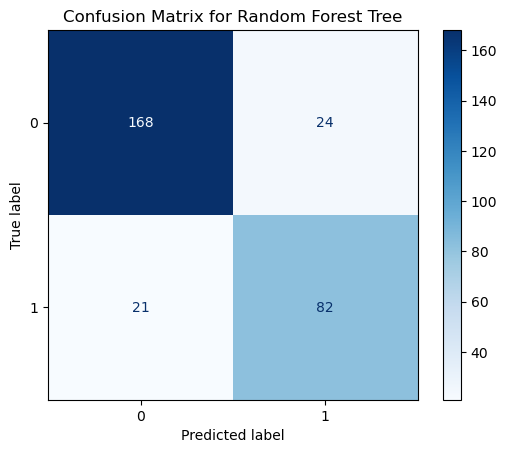

In [395]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Tree")
plt.show()

### 3. SVM

In [354]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [396]:
Y_pred=svc.predict(X_test)

In [397]:
print("Accuracy of SVM :",accuracy_score(Y_test,Y_pred))

Accuracy of SVM : 0.6949152542372882


In [398]:
cvs=cross_val_score(svc,X_train,Y_train,cv=10,scoring="accuracy")
print("Cross Validation Score :",cvs)
print("Mean Accuracy :",cvs.mean())

Cross Validation Score : [0.76666667 0.65       0.71666667 0.66666667 0.66666667 0.73333333
 0.66101695 0.6779661  0.62711864 0.6440678 ]
Mean Accuracy : 0.6810169491525424


In [399]:
print("Classification Report :\n",classification_report(Y_test,Y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       192
           1       0.62      0.32      0.42       103

    accuracy                           0.69       295
   macro avg       0.67      0.61      0.61       295
weighted avg       0.68      0.69      0.66       295



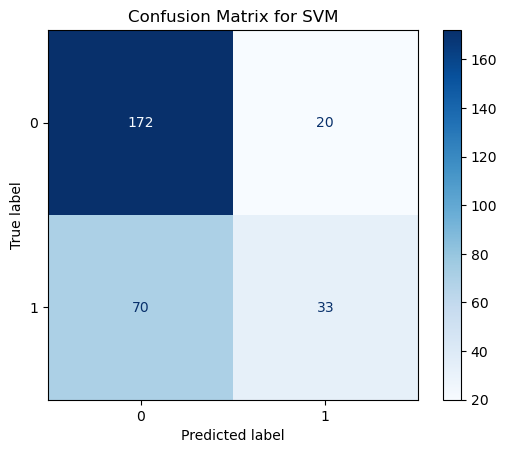

In [400]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM")
plt.show()

### 4. XgBoost

In [358]:
xg=XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [401]:
Y_pred=xg.predict(X_test)

In [402]:
print("Accuracy of XGBoost :",accuracy_score(Y_test,Y_pred))

Accuracy of XGBoost : 0.8101694915254237


In [403]:
cvs=cross_val_score(xg,X_train,Y_train,cv=10,scoring="accuracy")
print("Cross Validation Score :",cvs)
print("Mean Accuracy :",cvs.mean())

Cross Validation Score : [0.76666667 0.76666667 0.78333333 0.78333333 0.78333333 0.71666667
 0.79661017 0.76271186 0.77966102 0.72881356]
Mean Accuracy : 0.766779661016949


In [404]:
print("Classification Report :\n",classification_report(Y_test,Y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       192
           1       0.70      0.79      0.74       103

    accuracy                           0.81       295
   macro avg       0.79      0.80      0.80       295
weighted avg       0.82      0.81      0.81       295



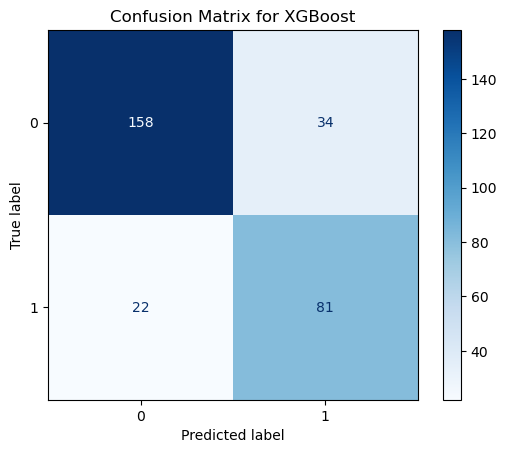

In [405]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

#### From Above Model we can see Random forest performs the best with a accuracy of 84% so we will use random forest as our prediction model

### Parameter Tuning for Random Forest model

In [406]:
from sklearn.model_selection import GridSearchCV

In [407]:
param={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [408]:
grid = GridSearchCV(estimator=rf, param_grid=param, cv=10, n_jobs=-1, verbose=2)

In [409]:
grid.fit(X_train,Y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [410]:
best_params = grid.best_params_

In [411]:
best_params

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [413]:
model=RandomForestClassifier(bootstrap = False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50)

In [414]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50)

In [415]:
Y_pred=model.predict(X_test)

In [417]:
print("Accuracy of model :",accuracy_score(Y_test,Y_pred))

Accuracy of model : 0.8440677966101695


### Even after hyper parameter tuning the accuracy of model remain same as 84%

###